# Preentrega - Proyecto Data Science


# Educacion superior vinculada a calidad de acceso al mercado laboral

Profesor: Jorge Ruiz


Tutor: Lucila Adanchú

Alumno: Maria Cecilia Zubin


Comision: 61615

# Acceso a los datos


In [143]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
df = pd.read_csv('/dataset/dataset original.csv', encoding='latin-1', delimiter=';')

# Informacion del Dataset

In [144]:
df.head()

,Legajo,Estado,Estructura,Convenio,Categoria,ID_Cat,Ingreso,Sexo,provincia,puesto,piramide,Titulo,ID_PuestoBasico,ID_Banco,Banco Pago de Rem,Enero,Febrero,Marzo
0,231,ACTI,Fuera de convenio,FCON,Fuera de Convenio,FCC,08/09/2015,M,FORM,Analista de Mantenimiento,6,NO,AMT,7,BANCO DE GALICIA Y BUENOS AIRES S.A.,487369,633580,760296
1,236,ACTI,Dentro de convenio,CC-781,27 Hs. CATEGORIA OP. A CCT 781,OP27,14/09/2015,F,FORM,Operador,8,NO,CDT,44,BANCO HIPOTECARIO S.A.,226936,251899,251899
2,1420,ACTI,Fuera de convenio,FCON,Fuera de Convenio,FCC,02/02/2009,F,CBA,Team Leader Operaciones,7,NO,TLC,7,BANCO DE GALICIA Y BUENOS AIRES S.A.,481271,625652,750782
3,1444,ACTI,Dentro de convenio,ATCC,"36,0 Hs. CATEGORIA 3 CCT688/14",H01,02/02/2009,F,CBA,Operador,8,NO,CDT,72,BANCO SANTANDER RIO S.A.,314974,349622,349622
4,1470,ACTI,Dentro de convenio,ATCC,"30,0 Hs. CATEGORIA 3 CCT688/14",H13,23/02/2009,F,CBA,Operador,8,NO,CDT,72,BANCO SANTANDER RIO S.A.,262479,291351,291351


In [145]:
print(df.dtypes)

Legajo                int64
Estado               object
Estructura           object
Convenio             object
Categoria            object
ID_Cat               object
Ingreso              object
Sexo                 object
provincia            object
puesto               object
piramide              int64
Titulo               object
ID_PuestoBasico      object
ID_Banco              int64
Banco Pago de Rem    object
Enero                 int64
Febrero               int64
Marzo                 int64
dtype: object


# Descripcion de Variables

Legajo: numero identificador del empleado, ID univoco que no se repite dentro del dataset.

Estado: hace referencia a si el empleado se encuentra activo al momento del armado del dataset.

Estructura: detalla la estructura de liquidación bajo la cual se encuentra contenido el empleado. Los puestos asociados a staff, analistas, supervisores, responsables, etc., son los asociados al personal fuera de convenio. El personal que realiza tareas operativas detalladas explícitamente en una convención colectiva de trabajo nomenclada y registrada como tal, están asociados al personal dentro de convenio. [Fuera de convenio, Dentro de convenio]

Convenio: detalla los posibles convenios al que puede pertenecer el empleado [FCON,CC-781,ATCC]
Categoría: detalla la categoría a la que pertenece el empleado

ID_Cat: código de la categoría del empleado.

Ingreso: fecha de ingreso del empleado a la empresa.

Sexo: sexo del empleado [M: Hombre, F: Mujer]

Provincia: sucursal en la que el empleado se encuentra actualmente prestando servicios [FORM,CBA, CABA2]

Puesto: se detallan las codificaciones y puestos de todo el personal

Pirámide: detalla el nivel de jerarquía en el organigrama de la empresa, siendo 8 el valor que se ubica en la base de la piramide y 0 el ultimo valor de la cima de la misma [0,1,2,3,4,5,6,7,8]

Título: hace referencia a la posesión del mismo [SI,NO]

ID_PuestoBasico: código del puesto del empleado.

ID Banco: código del banco donde el empleado percibe sus haberes.



# Desctipcion del Dataset

En la descripcion del dataset, al solicitar el detalle de cada tipo de variable, se observa, que esta leyendo tres columnas que poseen datos de sueldo, por ende son numericas, como de tipo objeto. Por tal motivo se procede a la correccion de las mismas.

In [146]:
columnas_objeto = df.select_dtypes(include=['object']).columns
print("Columnas que Pandas interpreta como 'object':\n", columnas_objeto)

Columnas que Pandas interpreta como 'object':
 Index(['Estado', 'Estructura', 'Convenio', 'Categoria', 'ID_Cat', 'Ingreso',
       'Sexo', 'provincia', 'puesto', 'Titulo ', 'ID_PuestoBasico',
       'Banco Pago de Rem'],
      dtype='object')


In [147]:
df['Legajo'] = df['Legajo'].astype(str)

In [148]:
print(df['Legajo'].dtype)

object


Se modifica el tipo de dato del legajo de numero a texto, para que no genere distorsion a nivel estadistico, debido a que no es un valor numerico relevante en este caso

In [149]:
print(df.dtypes)

Legajo               object
Estado               object
Estructura           object
Convenio             object
Categoria            object
ID_Cat               object
Ingreso              object
Sexo                 object
provincia            object
puesto               object
piramide              int64
Titulo               object
ID_PuestoBasico      object
ID_Banco              int64
Banco Pago de Rem    object
Enero                 int64
Febrero               int64
Marzo                 int64
dtype: object


In [150]:
df.shape

(2205, 18)

El dataset obtenido posee 2205 filas y 18 columnas

In [151]:
df.duplicated().value_counts()

,count
False,2205


El dataset no posee filas repetidas.

In [152]:
df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Legajo             2205 non-null   object
 1   Estado             2205 non-null   object
 2   Estructura         2205 non-null   object
 3   Convenio           2205 non-null   object
 4   Categoria          2205 non-null   object
 5   ID_Cat             2205 non-null   object
 6   Ingreso            2205 non-null   object
 7   Sexo               2205 non-null   object
 8   provincia          2205 non-null   object
 9   puesto             2205 non-null   object
 10  piramide           2205 non-null   int64 
 11  Titulo             2205 non-null   object
 12  ID_PuestoBasico    2205 non-null   object
 13  ID_Banco           2205 non-null   int64 
 14  Banco Pago de Rem  2205 non-null   object
 15  Enero              2205 non-null   int64 
 16  Febrero            2205 non-null   int64 


analisis de valores nulos, no posee.


In [154]:
df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Legajo             2205 non-null   object
 1   Estado             2205 non-null   object
 2   Estructura         2205 non-null   object
 3   Convenio           2205 non-null   object
 4   Categoria          2205 non-null   object
 5   ID_Cat             2205 non-null   object
 6   Ingreso            2205 non-null   object
 7   Sexo               2205 non-null   object
 8   provincia          2205 non-null   object
 9   puesto             2205 non-null   object
 10  piramide           2205 non-null   int64 
 11  Titulo             2205 non-null   object
 12  ID_PuestoBasico    2205 non-null   object
 13  ID_Banco           2205 non-null   int64 
 14  Banco Pago de Rem  2205 non-null   object
 15  Enero              2205 non-null   int64 
 16  Febrero            2205 non-null   int64 


# Columnas Categoricas

In [155]:
df.describe(include = 'object').T

,count,unique,top,freq
Legajo,2205,2205,231,1
Estado,2205,1,ACTI,2205
Estructura,2205,2,Dentro de convenio,1789
Convenio,2205,3,ATCC,1398
Categoria,2205,17,"36,0 Hs. CATEGORIA 3 CCT688/14",616
ID_Cat,2205,17,H01,616
Ingreso,2205,649,01/08/2022,45
Sexo,2205,2,F,1564
provincia,2205,3,CBA,1620
puesto,2205,71,Operador,1789


# Columnas Numericas

In [126]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
piramide,2205.0,7.600000,0.993902,0.0,8.0,8.0,8.0,8.0
ID_Banco,2205.0,54.562812,32.542047,7.0,27.0,72.0,72.0,150.0
Enero,2205.0,333951.576871,204889.529095,168101.0,262479.0,306225.0,314974.0,4668357.0
Febrero,2205.0,388366.269841,274046.567680,186592.0,291351.0,339910.0,349622.0,6068864.0
Marzo,2205.0,411957.604082,338883.543822,186592.0,291351.0,339910.0,349622.0,6982637.0


# Filtrado de valores absolutos

In [125]:
df = df[(df['Enero'] > 0) & (df['Febrero'] >= 0) & (df['Marzo'] > 0)]

El dataset esta basado en datos de sueldo por lo cual ningun valor pordria ser negativo.

In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from matplotlib.ticker import FormatStrFormatter
from seaborn import boxplot, distplot

In [141]:
pd.set_option('display.max_columns', None)
pd.set_option("display.max_colwidth", None)
warnings.filterwarnings('ignore')
sns.set_style('darkgrid')

# Analisis de variables numericas


Planteo de Hipotesis


Hipótesis Nº1: El poseer un titulo universitario es un factor determinante para tener acceso a puestos jerárquicos, por ende, de mayor ingreso.

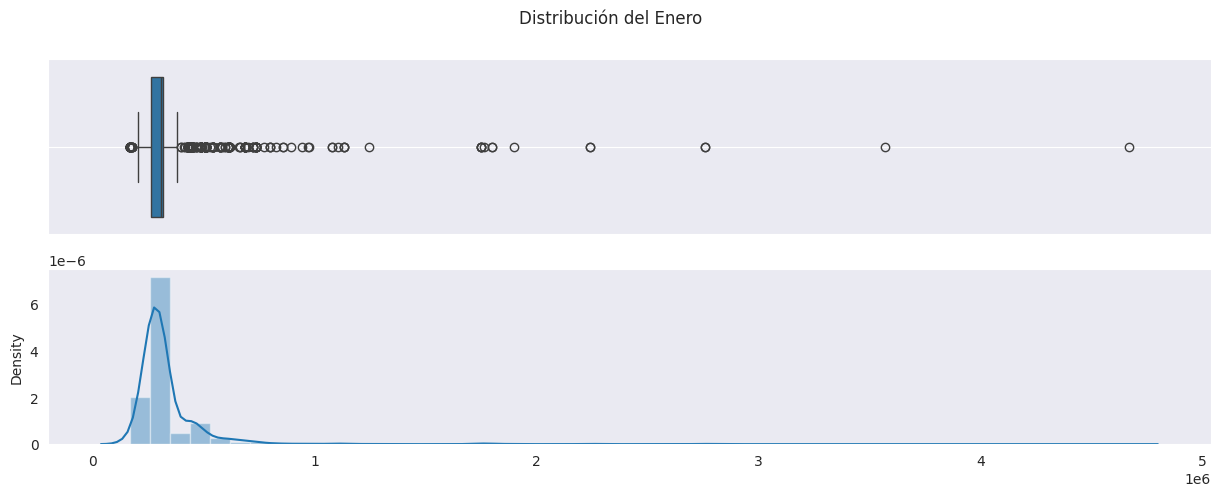

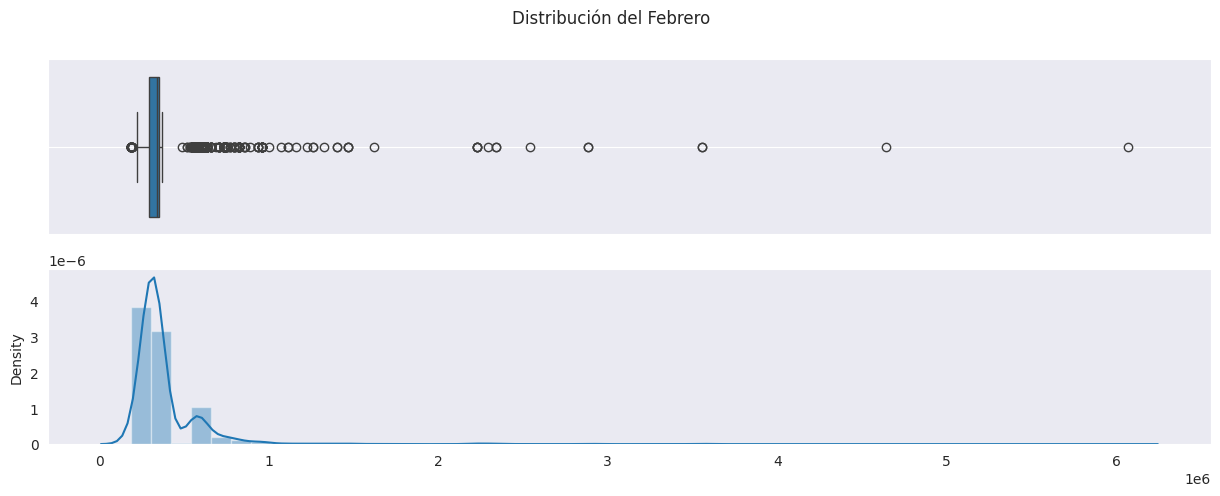

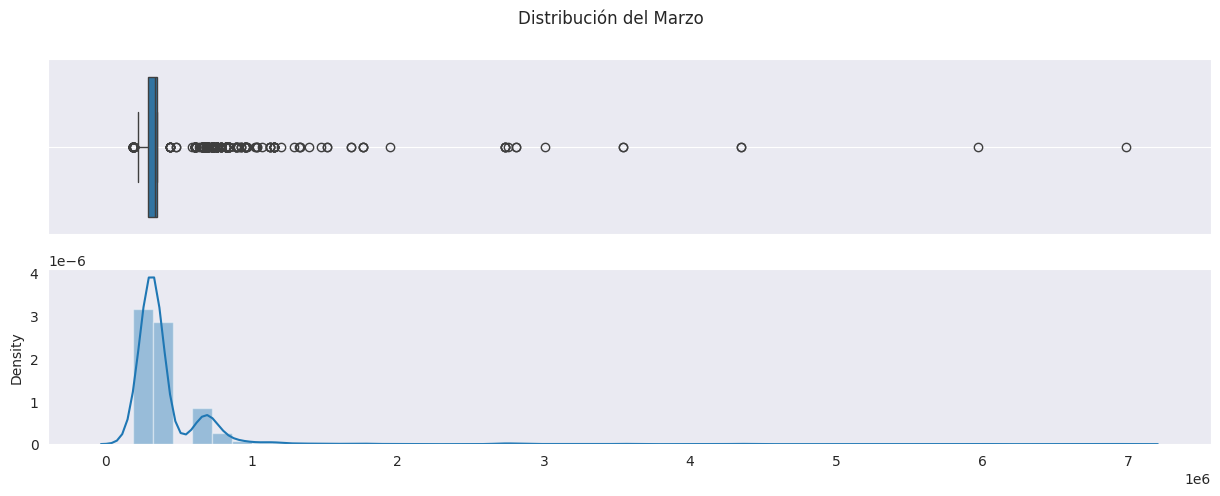

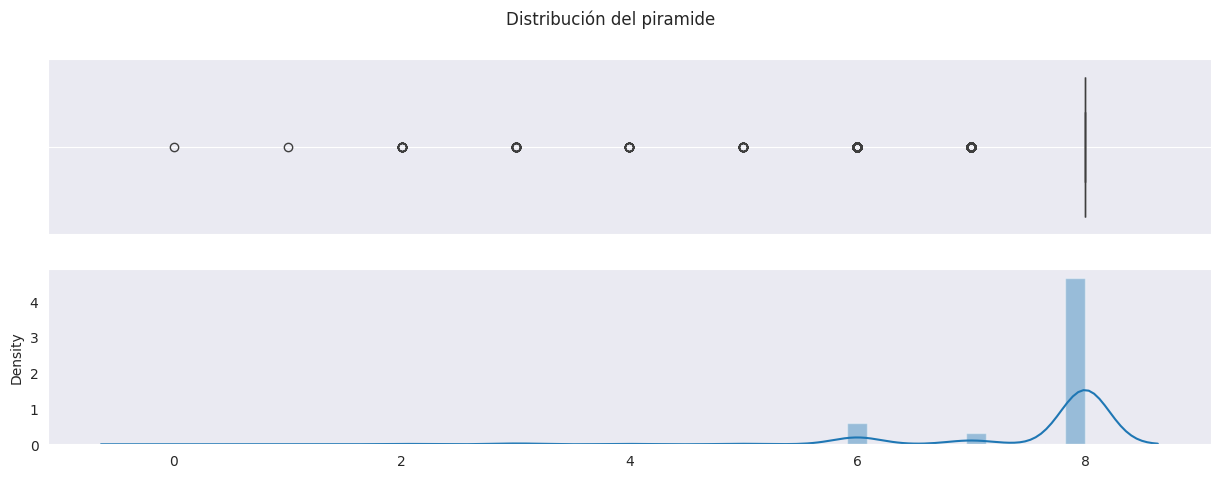

In [168]:
numerical_features = ['Enero', 'Febrero', 'Marzo', 'piramide']
for _, feature in enumerate(numerical_features):
    fig, axes = plt.subplots(2, 1, figsize=(15, 5), sharex=True)
    fig.suptitle(f'Distribución del {feature}')
    sns.boxplot(x = df[feature], ax = axes[0])
    sns.distplot(x = df[feature], ax = axes[1])
    axes[0].grid()
    axes[1].grid()
    plt.show()

In [203]:
import numpy as np
for feature in numerical_features:
    quartiles = np.percentile(df[feature], [25, 50, 75])
    print(f"Cuartiles para {feature}:")
    print(f"Q1: {quartiles[0]}")
    print(f"Q2 (Mediana): {quartiles[1]}")
    print(f"Q3: {quartiles[2]}")
    print("----")


Cuartiles para Enero:
Q1: 262479.0
Q2 (Mediana): 306225.0
Q3: 314974.0
----
Cuartiles para Febrero:
Q1: 291351.0
Q2 (Mediana): 339910.0
Q3: 349622.0
----
Cuartiles para Marzo:
Q1: 291351.0
Q2 (Mediana): 339910.0
Q3: 349622.0
----
Cuartiles para piramide:
Q1: 8.0
Q2 (Mediana): 8.0
Q3: 8.0
----


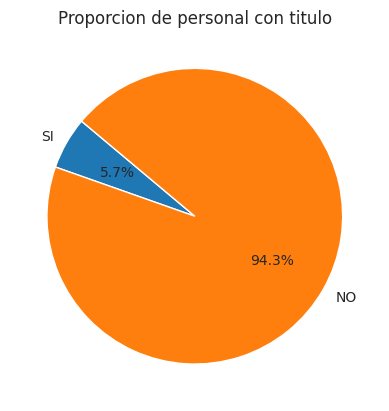

In [163]:
labels = ['SI', 'NO']
sizes = [126, 2079]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Proporcion de personal con titulo')
plt.show()


Como puede visualizarse en los graficos, se comprueba la hipotesis nº1, debido a que los mayores ingresos estan concetrados en la parte superior de la piradmide organizativa, al igual que el tipo de jerarquia de los puestos, en esos casos lo que caracteriza a la poblacion es que poseen titulo universitario.

Hipótesis Nº2: La ubicación geográfica del empleado influye en la obtención de un título universitario.

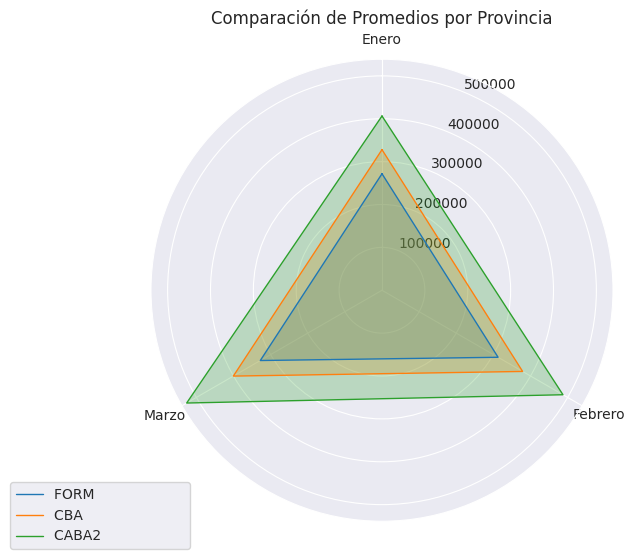

In [175]:
import matplotlib.pyplot as plt
import numpy as np
provincias = df['provincia'].unique()
promedios = {}
for provincia in provincias:
    promedios[provincia] = df[df['provincia'] == provincia][['Enero', 'Febrero', 'Marzo']].mean()
categorias = list(promedios[provincias[0]].index)
valores = [[promedios[provincia][categoria] for categoria in categorias] for provincia in provincias]
N = len(categorias)
angulos = [n / float(N) * 2 * np.pi for n in range(N)]
angulos += angulos[:1]

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)

for i, provincia in enumerate(provincias):
    valores_provincia = valores[i]
    valores_provincia += valores_provincia[:1]
    ax.plot(angulos, valores_provincia, linewidth=1, linestyle='solid', label=provincia)
    ax.fill(angulos, valores_provincia, alpha=0.25)

ax.set_xticks(angulos[:-1])
ax.set_xticklabels(categorias)
ax.set_title('Comparación de Promedios por Provincia')
ax.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.show()


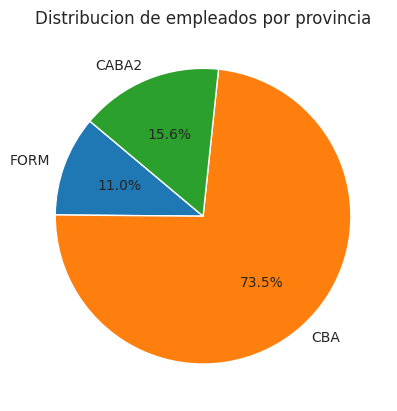

In [185]:
labels = ['FORM', 'CBA','CABA2']
sizes = [242,1620, 343]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Distribucion de empleados por provincia')
plt.show()


La poblacion que posee una cantidad superior de Titulos universitarios, se encuentran en la provincia de Cordoba. La Universidad Nacional de Córdoba es una universidad pública de Argentina. Tiene sede en la ciudad de Córdoba. Fundada el 19 de junio de 1613, es la más antigua del país y una de las primeras de América. Su enseñanza es libre, gratuita y laica. Por tal  motivo, puede inferirse, que la hipotesis se cumpliria.

Hipótesis Nº3: La población  de sexo femenino que posee título universitario es mayor, que la población de sexo masculino,

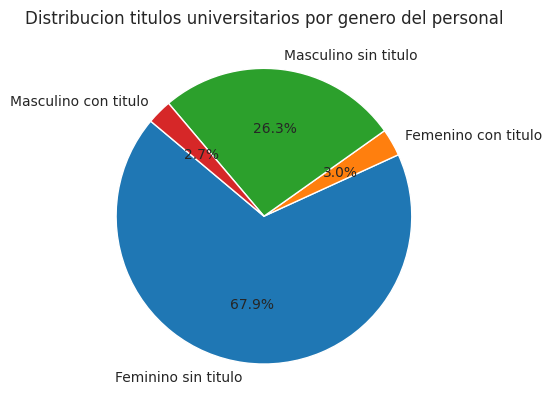

In [204]:
labels = ['Feminino sin titulo', 'Femenino con titulo','Masculino sin titulo','Masculino con titulo']
sizes = [1498,66,581,60]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Distribucion titulos universitarios por genero del personal')
plt.show()


Del total de poblacion de 2205 empleados, siendo 1564 de sexo femenino, 641 de sexo masculino. De los cuales en el caso del pesonal femenino, 1498 no poseen titulo universitario, mientras que 66 de ellas, si lo posee. Para el caso de la poblacion masculina, 581 son los que no poseen titulo universitario, mientras que 60 son lo que si lo poseen.